In [1]:
# Import Dependencies
import pandas as pd
import gmaps

from config import gkey

#Access maps with unique API key
gmaps.configure(api_key=gkey)

#disabling SetWithWariningCopy error
#pd.set_option('mode.chained_assignment',None)

In [2]:
# Make a reference to the books.csv file path
csv_path = "Data/get_it_done_311_requests_datasd_noself.csv"

# Read the csv and store into Pandas DataFrame
# low_memory=False is added to resolve an error that occured when importing the csv
df = pd.read_csv(csv_path, low_memory=False)
# df.head(5)


In [3]:
# dropping the columns that we don't need
data_df = df[['service_request_id','lat','long','address','description','case_record_type','district']]
# data_df.head()

In [4]:
des = data_df.groupby('description').count()
# des.head()


In [5]:
# Create a list containing coordinates
# having problems converting "Lat" and "Lng" in this dataframe to float. Using 'lat' and 'long' instead. Can anyone fix?
#if someone else has a better way to do this have at it...

data_df = data_df.dropna()
locations = data_df[["lat", "long"]].astype(float)
# data_df.head()
locations['lat'].count()

    

265789

In [6]:
locations_sample = locations.sample(1000, replace = True)
locations_sample.count()

lat     1000
long    1000
dtype: int64

In [7]:
# Customize the size of the figure
#just copied this from our class example, we can change
# figure_layout = {
#     'width': '800px',
#     'height': '800px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }
# fig = gmaps.figure(layout=figure_layout)
# fig

In [8]:
# Assign the marker layer to a variable
# markers = gmaps.marker_layer(locations_sample)

# # Add the layer to the map
# fig.add_layer(markers)
# fig

In [9]:
import json
import os
import requests
from pprint import pprint
from config import ckey

In [10]:
# census base url based on 2018 tract level data

# url = 'https://api.census.gov/data/2016/pdb/tract/?get=County_name,State_name,Tot_Population_ACS_12_16,Pop_18_24_ACS_12_16,Pop_25_44_ACS_12_16,Pop_45_64_ACS_12_16,Pop_65plus_ACS_12_16&for=tract:*&in=state:06%20county:0073&key='
# url = 'https://api.census.gov/data/2018/pdb/tract?get=County_name,State_name,Tot_Population_CEN_2010&for=tract:*&in=state:01%20county:001&key='

url = 'https://api.census.gov/data/2018/pdb/tract?get=County_name,State_name,Tot_Population_ACS_12_16&for=tract:*&in=state:06%20county:073&key='
query_url = url + ckey


In [11]:
response = requests.get(query_url).json()
# pprint(response)

In [12]:
census = pd.DataFrame(response)

census.to_csv('Data/census(Jes).csv', index = False)

In [13]:
# add more query variables

pop_t = 'Tot_Population_ACS_12_16'
pop_25_44 = 'Pop_25_44_ACS_12_16'
pop_45_64 = 'Pop_45_64_ACS_12_16'
pop_64plus = 'Pop_65plus_ACS_12_16'


url = f"https://api.census.gov/data/2018/pdb/tract?get=County_name,State_name&{pop_t}&{pop_25_44}&{pop_45_64}&{pop_64plus}&for=tract:*&in=state:06%20county:073&key="
query_url = url + ckey

In [14]:
response2 = requests.get(query_url).json()
# pprint(response2)

In [15]:
census2 = pd.DataFrame(response2)
# census2.head()

In [16]:
# make first row the header row

census2 = census2.rename(columns=census2.iloc[0]).drop(census2.index[0])
# census2.head()


In [17]:
# rename columns

census2 = census2.rename(columns={'County_name':'County', 'State_name':'State',
                                  'Tot_Population_ACS_12_16': 'Total Population',
                                  'Pop_25_44_ACS_12_16': 'Population ages 25 to 44',
                                  'Pop_45_64_ACS_12_16': 'Population ages 45 to 64',
                                  'Pop_65plus_ACS_12_16': 'Population ages 65 and above',
                                  'state': 'State',
                                  'county':'County',
                                  'tract': 'Tract'    
})

In [18]:
census3 = census2.copy()
census3.head()

,County,State,Total Population,Population ages 25 to 44,Population ages 45 to 64,Population ages 65 and above,State,County,Tract
1,San Diego County,California,2773,432,970,875,06,073,000100
2,San Diego County,California,2158,642,633,503,06,073,000201
3,San Diego County,California,4828,2159,1197,509,06,073,000202
4,San Diego County,California,4946,2256,1289,858,06,073,000300
5,San Diego County,California,3916,2106,764,373,06,073,000400


In [19]:
# census_pop = census3.groupby('Tract')
# census_pop.head(5)
census3 = census3.rename(columns = {'Tract': 'census_tract'})
census3 = census3.reset_index()
census3.head()

,index,County,State,Total Population,Population ages 25 to 44,Population ages 45 to 64,Population ages 65 and above,State,County,census_tract
0,1,San Diego County,California,2773,432,970,875,06,073,000100
1,2,San Diego County,California,2158,642,633,503,06,073,000201
2,3,San Diego County,California,4828,2159,1197,509,06,073,000202
3,4,San Diego County,California,4946,2256,1289,858,06,073,000300
4,5,San Diego County,California,3916,2106,764,373,06,073,000400


In [20]:
len(census3)

628

In [21]:
# save dataframe to csv

census2.to_csv('Data/census2(Jes).csv', index = False)

In [22]:
import csv
import pandas as pd

file = 'Data/even_cleaner_data.csv'
data311 = pd.read_csv(file)
data311 = pd.DataFrame(data311)
# data311.head()

In [23]:
data311_v1 = data311[['service_request_id','address','case_record_type','sap_problem_type','district','House_Number','Clean_Street','Neighborhood','api_address','census_tract']]

data311_v1.head()


,service_request_id,address,case_record_type,sap_problem_type,district,House_Number,Clean_Street,Neighborhood,api_address,census_tract
0,346513,"3158 Main St, San Diego, CA 92113, USA,",Street Division,Graffiti Removal,8.0,3158,Main Street,Barrio Logan,3158+Main+Street,3902.0
1,236808,4100-4174 Eastgate Mall,Street Division Closed Case,Other Problem,1.0,4114,Eastgate Mall,La Jolla,4114+Eastgate+Mall,8305.0
2,265052,3176 Reynard Way,Street Division Closed Case,NaN,3.0,3178,Reynard Way,MIddletown,3178+Reynard+Way,6100.0
3,314076,"4537 Imperial Ave, San Diego, CA 92113, USA",Street Division Closed Case,NaN,4.0,4537,Imperial Avenue,Mountain View,4537+Imperial+Avenue,3301.0
4,218543,"820 Wilbur Avenue, San Diego, CA, United States",Street Division Closed Case,NaN,2.0,820,Wilbur Avenue,Pacific Beach,820+Wilbur+Avenue,8003.0


In [79]:
data311_v3 = data311_v1.groupby('Neighborhood')['service_request_id'].count().reset_index()
data311_v3 = data311_v3.rename(columns = {'service_request_id': 'call count'})
data311_v3 = pd.DataFrame(data311_v3).reset_index(drop = True)
data311_v3.head()
# type(data311_v2)

,Neighborhood,call count
0,4S Ranch,3
1,Abbott Street,3
2,Adeline Gardens,1
3,Alliance,1
4,Allied Gardens,163


In [24]:
data311_callcount = data311_v1.groupby('census_tract')['service_request_id'].count().reset_index()
data311_v2 = data311_callcount.rename(columns = {'service_request_id': 'call count'})
data311_v2 = pd.DataFrame(data311_v2).reset_index(drop = True)
data311_v2.head()
# type(data311_v2)

,census_tract,call count
0,100.0,56
1,201.0,49
2,202.0,145
3,300.0,182
4,400.0,147


In [25]:
len(data311_v2)

285

In [89]:
# convert 'census_tract' column in both dataframes to string

data311_v2['census_tract'] = data311_v2['census_tract'].astype(float)
census3['census_tract'] = census3['census_tract'].astype(float)
print(census3.head())
data311_v2.head()

   index            County       State Total Population  \
0      1  San Diego County  California             2773   
1      2  San Diego County  California             2158   
2      3  San Diego County  California             4828   
3      4  San Diego County  California             4946   
4      5  San Diego County  California             3916   

  Population ages 25 to 44 Population ages 45 to 64  \
0                      432                      970   
1                      642                      633   
2                     2159                     1197   
3                     2256                     1289   
4                     2106                      764   

  Population ages 65 and above State County  census_tract  
0                          875    06    073         100.0  
1                          503    06    073         201.0  
2                          509    06    073         202.0  
3                          858    06    073         300.0  
4             

,census_tract,call count
0,100.0,56
1,201.0,49
2,202.0,145
3,300.0,182
4,400.0,147


In [27]:
census_311_c = pd.merge(census3, data311_v2, on = ['census_tract'], how = 'outer')
census_311_c 

,index,County,State,Total Population,Population ages 25 to 44,Population ages 45 to 64,Population ages 65 and above,State,County,census_tract,call count
0,1,San Diego County,California,2773,432,970,875,06,073,100.0,56.0
1,2,San Diego County,California,2158,642,633,503,06,073,201.0,49.0
2,3,San Diego County,California,4828,2159,1197,509,06,073,202.0,145.0
3,4,San Diego County,California,4946,2256,1289,858,06,073,300.0,182.0
4,5,San Diego County,California,3916,2106,764,373,06,073,400.0,147.0
5,6,San Diego County,California,2957,1373,725,400,06,073,500.0,68.0
6,7,San Diego County,California,2921,1447,731,432,06,073,600.0,125.0
7,8,San Diego County,California,4507,2310,1163,522,06,073,700.0,137.0
8,9,San Diego County,California,4232,1745,1310,549,06,073,800.0,129.0
9,10,San Diego County,California,5796,3138,1141,469,06,073,900.0,135.0


In [28]:
len(census_311_c)

628

In [29]:
# drop nas from dataframe
census_311_c = census_311_c.dropna()
census_311_c.head()
census_311_c.to_csv('Data/Total_Population_vs_Call_Count.csv')

In [30]:
len(census_311_c)

285

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt


In [32]:
census_311_c['Total Population'] = census_311_c['Total Population'].astype(int)

C:\Users\Jes\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
x = census_311_c['Total Population']
y = census_311_c['call count']
# print(y)

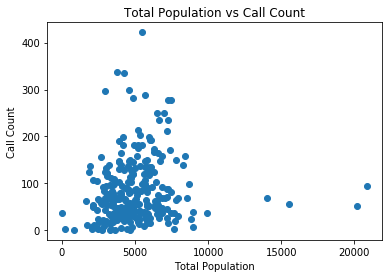

In [45]:
plt.scatter(x, y)
plt.xlabel('Total Population')
plt.ylabel('Call Count')
plt.title('Total Population vs Call Count')
plt.savefig('Total_Population_vs_Call_Count.png')
# plt.show()

In [35]:
plt.savefig('Total_Population_vs_Call_Count.png')

In [36]:
corr = x.corr(y)
corr

0.11210517481132028

In [37]:
high_pop = census_311_c.loc[census_311_c['Total Population'] > 10000]
high_pop

,index,County,State,Total Population,Population ages 25 to 44,Population ages 45 to 64,Population ages 65 and above,State,County,census_tract,call count
155,156,San Diego County,California,15549,4683,4587,639,06,073,8333.0,57.0
248,249,San Diego County,California,20851,6958,5159,1268,06,073,10014.0,95.0
425,426,San Diego County,California,20209,6120,4849,2257,06,073,17030.0,52.0
427,428,San Diego County,California,14056,3782,3577,1162,06,073,17032.0,69.0


In [38]:
high_pop_low_call = high_pop['census_tract']
high_pop_low_call = pd.DataFrame(high_pop_low_call)
high_pop_low_call

,census_tract
155,8333.0
248,10014.0
425,17030.0
427,17032.0


In [39]:
# data311_v1['census_tract'] = data311_v1['census_tract'].dtype
# data311_v1.head()
data311_v1['census_tract'].dtype

dtype('float64')

In [40]:
census3['census_tract'].dtype

dtype('float64')

In [41]:
census_list = list(high_pop_low_call['census_tract'])
census_list

[8333.0, 10014.0, 17030.0, 17032.0]

In [42]:

nbh = data311_v1.loc[(data311_v1['census_tract'] == census_list[0]) | (data311_v1['census_tract'] == census_list[1]) | (data311_v1['census_tract'] == census_list[2])
                     |(data311_v1['census_tract'] == census_list[3]),:]
nbh

,service_request_id,address,case_record_type,sap_problem_type,district,House_Number,Clean_Street,Neighborhood,api_address,census_tract
44,123300,"Rancho Bernardo Road and West Bernardo Drive, ...",Street Division Closed Case,Light Out,5.0,11589,Rancho Bernardo Road,Rancho Bernardo,11589+Rancho+Bernardo+Road,17032.0
75,86193,"16550 W Bernardo Dr, San Diego, CA 92127, USA",Street Division Closed Case,Pothole,5.0,16550,West Bernardo Drive,Rancho Bernardo,16550+West+Bernardo+Drive,17032.0
153,347810,"1183 Surf Crest Drive, San Diego, CA, USA",Street Division Closed Case,NaN,8.0,1183,Surf Crest Drive,Ocean View Hills,1183+Surf+Crest+Drive,10014.0
197,160229,"17967 Cassia Place, San Diego, CA, United States",Street Division Closed Case,Light Out,5.0,17967,Cassia Place,Rancho Bernardo,17967+Cassia+Place,17030.0
245,151386,1109 Sea Bird Way,Street Division Closed Case,NaN,8.0,1103,Sea Bird Way,Ocean View Hills,1103+Sea+Bird+Way,10014.0
258,232038,16500-16772 Via Del Campo,Street Division Closed Case,Light Out,5.0,16556,Via Del Campo,Rancho Bernardo,16556+Via+Del+Campo,17032.0
403,221016,"17045 Via Del Campo, San Diego, CA, United States",Street Division Closed Case,Pothole,5.0,17045,Via Del Campo,Rancho Bernardo,17045+Via+Del+Campo,17032.0
407,233237,"17931 Valladares Dr, San Diego, CA 92127, USA",Street Division Closed Case,NaN,5.0,17931,Valladares Drive,Rancho Bernardo,17931+Valladares+Drive,17030.0
459,321696,"Via Frontera, San Diego, CA, USA",Street Division Closed Case,NaN,5.0,10966,Via Frontera,Rancho Bernardo,10966+Via+Frontera,17032.0
706,232490,950-970 Dennery Rd,Street Division Closed Case,Graffiti Removal,8.0,1212,Dennery Road,Ocean View Hills,1212+Dennery+Road,10014.0


In [43]:
nbh['Neighborhood'].unique()

array(['Rancho Bernardo', 'Ocean View Hills', 'San Diego', 'Hidden Trails',
       'Bernardino Tr Corporate Center', 'Black Mountain Ranch',
       'Carmel Valley', 'Otay Mesa', 'California Terraces', 'Torrey Hills',
       'Carmel Country Highlands', '4S Ranch'], dtype=object)

In [44]:
low_call_neighborhoods = nbh.to_csv('Data/low_call_neighborhoods.csv')

In [49]:
zillow_data = pd.read_csv('Data/San_Diego_zillow_rental.csv')
zillow_data.head()

,Unnamed: 0,RegionName,City,State,Metro,CountyName,SizeRank,2010-05,2010-06,2010-07,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
0,59,Mira Mesa,San Diego,CA,San Diego,San Diego,60,NaN,NaN,NaN,...,1697.0,1719.0,1685.0,1669.5,1650.0,1670.5,1705.0,1756.0,1852.5,1841.0
1,101,University City,San Diego,CA,San Diego,San Diego,102,NaN,NaN,NaN,...,1926.0,1926.0,1945.0,1917.0,1908.0,1974.0,1940.0,1955.5,2007.5,2060.0
2,119,Carmel Valley,San Diego,CA,San Diego,San Diego,120,NaN,NaN,NaN,...,2244.0,2277.5,2260.0,2205.0,2213.5,2185.0,2250.0,2545.0,2550.0,2465.0
3,141,North Park,San Diego,CA,San Diego,San Diego,142,NaN,NaN,NaN,...,1500.0,1450.0,1425.0,1450.0,1495.0,1495.0,1495.0,1500.0,1500.0,1500.0
4,183,La Jolla,San Diego,CA,San Diego,San Diego,184,NaN,NaN,NaN,...,1872.5,1800.0,1995.0,1902.5,1945.0,1942.5,1937.5,2065.0,2050.0,2167.5


In [71]:
zillow_data = zillow_data.rename(columns = {'RegionName': 'Neighborhood','2018-06':'June 2018 Rent'})
zillow_data.head()

,Unnamed: 0,Neighborhood,City,State,Metro,CountyName,SizeRank,2010-05,2010-06,2010-07,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,June 2018 Rent
0,59,Mira Mesa,San Diego,CA,San Diego,San Diego,60,NaN,NaN,NaN,...,1697.0,1719.0,1685.0,1669.5,1650.0,1670.5,1705.0,1756.0,1852.5,1841.0
1,101,University City,San Diego,CA,San Diego,San Diego,102,NaN,NaN,NaN,...,1926.0,1926.0,1945.0,1917.0,1908.0,1974.0,1940.0,1955.5,2007.5,2060.0
2,119,Carmel Valley,San Diego,CA,San Diego,San Diego,120,NaN,NaN,NaN,...,2244.0,2277.5,2260.0,2205.0,2213.5,2185.0,2250.0,2545.0,2550.0,2465.0
3,141,North Park,San Diego,CA,San Diego,San Diego,142,NaN,NaN,NaN,...,1500.0,1450.0,1425.0,1450.0,1495.0,1495.0,1495.0,1500.0,1500.0,1500.0
4,183,La Jolla,San Diego,CA,San Diego,San Diego,184,NaN,NaN,NaN,...,1872.5,1800.0,1995.0,1902.5,1945.0,1942.5,1937.5,2065.0,2050.0,2167.5


In [75]:
neighborhood_311 = data311_v1['Neighborhood']
neighborhood_311.head()


0     Barrio Logan
1         La Jolla
2       MIddletown
3    Mountain View
4    Pacific Beach
Name: Neighborhood, dtype: object

In [78]:
zillow_rent_nbh = zillow_data[['Neighborhood', 'June 2018 Rent']]
zillow_rent_nbh

,Neighborhood,June 2018 Rent
0,Mira Mesa,1841.0
1,University City,2060.0
2,Carmel Valley,2465.0
3,North Park,1500.0
4,La Jolla,2167.5
5,Pacific Beach,1750.0
6,Serra Mesa,2155.0
7,Hillcrest,1675.0
8,University Heights,1595.0
9,Mission Valley East,2042.5


In [84]:
zillow_311 = pd.merge(zillow_rent_nbh, data311_v3, on = 'Neighborhood', how = 'outer')
zillow_311.head()

,Neighborhood,June 2018 Rent,call count
0,Mira Mesa,1841.0,575.0
1,University City,2060.0,349.0
2,Carmel Valley,2465.0,271.0
3,North Park,1500.0,1169.0
4,La Jolla,2167.5,872.0


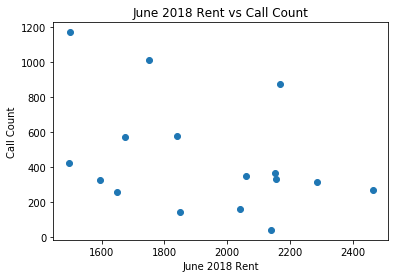

In [91]:
x = zillow_311['June 2018 Rent']
y = zillow_311['call count']
plt.xlabel('June 2018 Rent')
plt.ylabel('Call Count')
plt.title('June 2018 Rent vs Call Count')

plt.scatter(x, y)
plt.savefig('Data/June_2018_Rent_vs_Call_Count')

In [87]:
x.corr(y)

-0.3811630889454819